In [1]:
from model import Item, Categories, SaleItem

In [2]:
cat1 = Categories(created_date='03-06-2024', id='cat-001',name='Local coffee')

i1 = Item(created_date='12-06-2024', item_id='i_001', name='Super coffee', qr_code='0000',
price=3900, buying_price=3500, category=cat1)
i2 = Item('17-06-2024', 'i_002', 'Sunday Coffee', '0000', 3450, 3000, cat1)
i3 = Item("01-06-2024", "i_003", "Hsu Coffee", "0000", 5450, 5200, cat1)

In [3]:
sale1=  SaleItem(customer_id='CU_000001',created_date='15-06-2024',item=i1 )
sale2=  SaleItem(customer_id='CU_000001',created_date='21-06-2024',item=i1 )
sale3=  SaleItem(customer_id='CU_000001',created_date='21-06-2024',item=i2 )
sale4=  SaleItem(customer_id='CU_000001',created_date='21-06-2024',item=i3 )
sale5=  SaleItem(customer_id='CU_000001',created_date='01-07-2024',item=i2 )
sale6=  SaleItem(customer_id='CU_000001',created_date='01-07-2024',item=i1 )
sale7=  SaleItem(customer_id='CU_000001',created_date='10-07-2024',item=i3 )
sale8=  SaleItem(customer_id='CU_000001',created_date='10-07-2024',item=i2 )
sale9=  SaleItem(customer_id='CU_000001',created_date='10-07-2024',item=i3 )
total_sale = [sale1,sale2,sale3,sale4,sale5,sale6,sale7,sale8,sale9]

In [8]:
sale_item_dict = {
    "created_date": [],
    "item_name": [], 
    "profit":[], 
    "category_name": []
}

for cur_obj in total_sale:
    sale_item_dict["created_date"].append(cur_obj.created_date)
    sale_item_dict["item_name"].append(cur_obj.item.name)
    sale_item_dict["profit"].append(cur_obj.item.getProfit())
    sale_item_dict["category_name"].append(cur_obj.item.category.name)

sale_item_dict

{'created_date': ['15-06-2024',
  '21-06-2024',
  '21-06-2024',
  '21-06-2024',
  '01-07-2024',
  '01-07-2024',
  '10-07-2024',
  '10-07-2024',
  '10-07-2024'],
 'item_name': ['Super coffee',
  'Super coffee',
  'Sunday Coffee',
  'Hsu Coffee',
  'Sunday Coffee',
  'Super coffee',
  'Hsu Coffee',
  'Sunday Coffee',
  'Hsu Coffee'],
 'profit': [400, 400, 450, 250, 450, 400, 250, 450, 250],
 'category_name': ['Local coffee',
  'Local coffee',
  'Local coffee',
  'Local coffee',
  'Local coffee',
  'Local coffee',
  'Local coffee',
  'Local coffee',
  'Local coffee']}

In [9]:
!pip install pandas

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 16.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 16.9 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [10]:
import pandas as pd

In [11]:
sale_item_df = pd.DataFrame(sale_item_dict)
sale_item_df

,created_date,item_name,profit,category_name
0,15-06-2024,Super coffee,400,Local coffee
1,21-06-2024,Super coffee,400,Local coffee
2,21-06-2024,Sunday Coffee,450,Local coffee
3,21-06-2024,Hsu Coffee,250,Local coffee
4,01-07-2024,Sunday Coffee,450,Local coffee
5,01-07-2024,Super coffee,400,Local coffee
6,10-07-2024,Hsu Coffee,250,Local coffee
7,10-07-2024,Sunday Coffee,450,Local coffee
8,10-07-2024,Hsu Coffee,250,Local coffee


In [12]:
sale_item_df.iloc[1]

created_date       21-06-2024
item_name        Super coffee
profit                    400
category_name    Local coffee
Name: 1, dtype: object

In [13]:
sale_item_df["item_name"]

0     Super coffee
1     Super coffee
2    Sunday Coffee
3       Hsu Coffee
4    Sunday Coffee
5     Super coffee
6       Hsu Coffee
7    Sunday Coffee
8       Hsu Coffee
Name: item_name, dtype: object

In [24]:
sale_item_df[sale_item_df["item_name"] == "Sunday Coffee"]

,created_date,item_name,profit,category_name
2,21-06-2024,Sunday Coffee,450,Local coffee
4,01-07-2024,Sunday Coffee,450,Local coffee
7,10-07-2024,Sunday Coffee,450,Local coffee


In [33]:
import numpy as np
import matplotlib.pyplot as plt

Super coffee
['01-07-2024', '15-06-2024', '21-06-2024']
[np.int64(400), np.int64(400), np.int64(400)]
Hsu Coffee
['10-07-2024', '21-06-2024']
[np.int64(500), np.int64(250)]
Sunday Coffee
['01-07-2024', '10-07-2024', '21-06-2024']
[np.int64(450), np.int64(450), np.int64(450)]


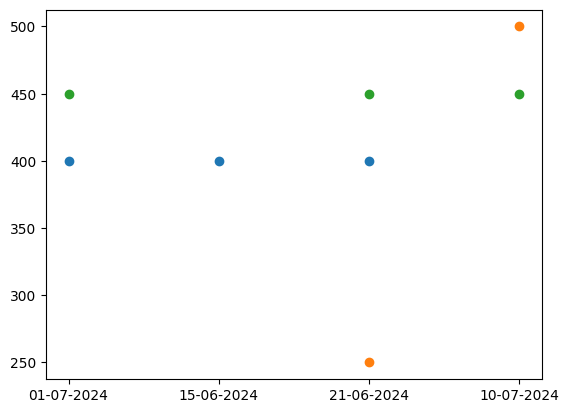

In [35]:
dist_item_name = set(sale_item_df["item_name"].to_numpy())
# print(type(dist_item_name))
dist_item_name

for cur_item_name in dist_item_name:
    cur_df = sale_item_df[sale_item_df["item_name"] == cur_item_name]
    # print(cur_df)

    x = list(set(cur_df["created_date"].to_numpy()))
    y = []

    for cur_x in x:
        temp_y = cur_df[cur_df["created_date"] == cur_x]["profit"].to_numpy()
        # print(temp_y)
        y.append(np.sum(temp_y))
    
    print(cur_item_name)
    print(x)
    print(y)
    # plt.plot(x, y)
    plt.scatter(x, y)
plt.show()


In [ ]:
!pip install matplotlib

Matplotlib is building the font cache; this may take a moment.


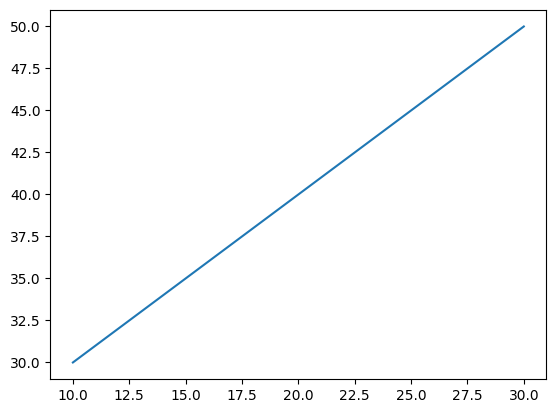

In [32]:
import matplotlib.pyplot as plt

x = [10, 20, 30]
y = [30, 40, 50]

plt.plot(x, y)